In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec

In [2]:
def get_events(tstamp,state, type):
    if type == "UP":
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==1,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events
    elif type == 'DOWN':
        mask = np.concatenate((np.array([False]),np.logical_and(state[1:]==0,state[1:]!=state[:-1] )))
        events = tstamp[mask]
        return events        
    elif type == "BOTH":
        mask = np.concatenate((np.array([False]),state[1:]!=state[:-1]))
        events = tstamp[mask]
        return events
    else:
        return None

In [3]:
fname = './tmp/untitled.csv'
    
data = np.genfromtxt(fname,dtype=float, delimiter=',',skip_header=1)
ts = data[:,0];
C1 = data[:,1];
C2 = data[:,2];

ref = get_events(ts,C1,"UP");
irq = get_events(ts,C2,"UP");
irq = irq[irq > ref[0]];
cnt = min(len(ref), len(irq));
ref = ref[0:cnt-1];
irq = irq[0:cnt-1];

In [6]:
diff_stress = (irq - ref)*1e9;

Min: -166.67
Max: 166.67
Mean: 0.53


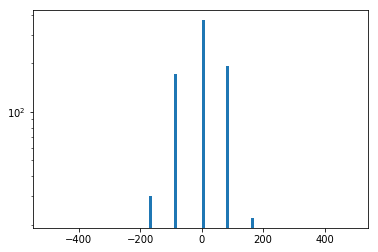

In [8]:
hist(diff_stress, bins=np.arange(-500,500,10));
yscale('log')
diff_stress_min = np.min(diff_stress);
diff_stress_max = np.max(diff_stress);
diff_stress_mean = np.mean(diff_stress);
print "Min: %.2f" % diff_stress_min
print "Max: %.2f" % diff_stress_max
print "Mean: %.2f" % diff_stress_mean